In [141]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import hvplot.pandas
import matplotlib.pyplot as plt

In [142]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
satisfaction_df = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health_Final.csv')

# Review the DataFrame
satisfaction_df.head()

,Employee_ID,Age,Gender,Job_Role,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Hybrid,47,7,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,Remote,52,4,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0004,27,Male,Software Engineer,Onsite,32,8,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
3,EMP0005,49,Male,Sales,Onsite,35,12,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
4,EMP0006,59,Non-binary,Sales,Hybrid,39,3,NaN,No,Increase,Unsatisfied,NaN,Average,South America


In [143]:
satisfaction_df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Work_Location',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')

In [144]:
# Split and preprocess data into our features and target arrays
y = pd.get_dummies(satisfaction_df.Satisfaction_with_Remote_Work,dtype='int')['Satisfied']
X = pd.get_dummies(satisfaction_df.drop([
    'Employee_ID',
    'Productivity_Change', 
    'Satisfaction_with_Remote_Work'
    ], axis=1),dtype='int')

In [145]:
#Counting the number of data points for the target variable productivity
len(y)

2235

In [146]:
#counting the number of rows for the feature variables
len(X)

2235

In [147]:
#number fo unique values for each feature variable
X.nunique()

Age                                      39
Hours_Worked_Per_Week                    41
Number_of_Virtual_Meetings               16
Gender_Female                             2
Gender_Male                               2
Gender_Non-binary                         2
Gender_Prefer not to say                  2
Job_Role_Data Scientist                   2
Job_Role_Designer                         2
Job_Role_HR                               2
Job_Role_Marketing                        2
Job_Role_Project Manager                  2
Job_Role_Sales                            2
Job_Role_Software Engineer                2
Work_Location_Hybrid                      2
Work_Location_Onsite                      2
Work_Location_Remote                      2
Mental_Health_Condition_Anxiety           2
Mental_Health_Condition_Burnout           2
Mental_Health_Condition_Depression        2
Access_to_Mental_Health_Resources_No      2
Access_to_Mental_Health_Resources_Yes     2
Physical_Activity_Daily         

In [148]:
# Not proceeding with binning for the above columns as the distribution seems to be equal..tried binning but no change in accuracy 

In [149]:
#Getting the list of x variables
X.columns

Index(['Age', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Job_Role_Data Scientist',
       'Job_Role_Designer', 'Job_Role_HR', 'Job_Role_Marketing',
       'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Work_Location_Hybrid',
       'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_No',
       'Access_to_Mental_Health_Resources_Yes', 'Physical_Activity_Daily',
       'Physical_Activity_Weekly', 'Sleep_Quality_Average',
       'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America'],
      dtype='object')

In [150]:
# Target variable unique values and their counts
y.value_counts()

Satisfied
1    1121
0    1114
Name: count, dtype: int64

In [151]:
#chcking the X  variables in the Data Frame
X.head()

,Age,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Job_Role_Data Scientist,Job_Role_Designer,Job_Role_HR,...,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,47,7,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,40,52,4,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,27,32,8,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,49,35,12,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,59,39,3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [152]:

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [153]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [154]:
#Performing Principal component analysis to find the most influential feature variables as our data set had a large number of feature variables
from sklearn.decomposition import PCA
#Apply PCA
pca = PCA(n_components=20)
pca.fit_transform(X_train_scaled)


array([[ 0.85112846, -0.38930906,  1.45160542, ...,  0.83461801,
        -0.68821788,  0.21616686],
       [ 1.79346338, -0.06700471, -0.88986902, ...,  0.50322663,
         0.42356645, -0.61157975],
       [ 1.46888581,  1.43470152,  1.10119814, ...,  1.16856252,
        -1.19817655,  0.43757427],
       ...,
       [-0.73834647,  1.80120358,  0.52181083, ...,  0.33884816,
        -0.70285886, -0.12837219],
       [ 1.98699279,  0.39937655, -0.54706908, ...,  0.56805666,
         0.68047752, -0.26508364],
       [ 2.0858975 ,  1.65829807,  0.34268761, ..., -0.07656334,
         0.66631761, -1.31511053]])

In [155]:
#Determining the explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance by each component: [0.06160571 0.05131333 0.04849841 0.04707063 0.0461547  0.04561602
 0.0422551  0.04187104 0.04069299 0.03941136 0.03843106 0.03779877
 0.03744785 0.03730833 0.03637778 0.03608873 0.03506317 0.03457872
 0.03374559 0.03322603]
Total explained variance: 0.8245552956104235


In [156]:
# Define the model - deep neural network Model
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 40)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 15)             │           615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,112 (8.25 KB)

 Trainable params: 2,112 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

nn_hist = nn.fit(X_train_scaled, y_train, epochs=30, validation_split=0.2)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4654 - loss: 0.7179 - val_accuracy: 0.4702 - val_loss: 0.7062
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5321 - loss: 0.6891 - val_accuracy: 0.4673 - val_loss: 0.7061
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5492 - loss: 0.6816 - val_accuracy: 0.4673 - val_loss: 0.7039
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6077 - loss: 0.6678 - val_accuracy: 0.4940 - val_loss: 0.7039
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6053 - loss: 0.6646 - val_accuracy: 0.4792 - val_loss: 0.7054
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6020 - loss: 0.6596 - val_accuracy: 0.4821 - val_loss: 0.7060
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6123 - loss: 0.6587 - val_accuracy: 0.4762 - val_loss: 0.7077
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.6422 - val_accuracy: 0.4673 - val_loss:

In [158]:
# Save the model
nn.save("satisfaction_7.h5")

<Axes: >

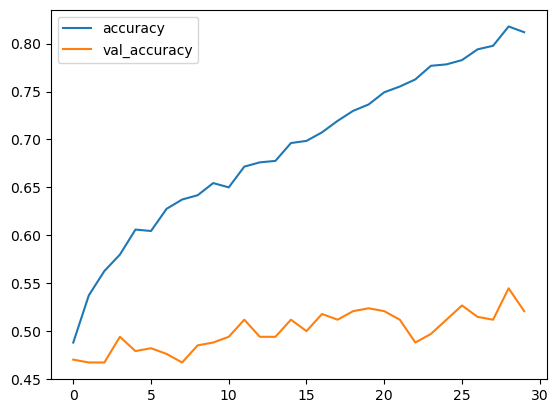

In [159]:
pd.DataFrame(nn_hist.history)[['accuracy','val_accuracy']].plot()

In [160]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18/18 - 0s - 3ms/step - accuracy: 0.5116 - loss: 0.9564
Loss: 0.9564050436019897, Accuracy: 0.5116279125213623


In [161]:
#Predicting the values for x_test data
ypred = nn.predict(X_test_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [162]:
#Printing the predicted y values which is an array
ypred

array([[0.1976011 ],
       [0.10138169],
       [0.7397421 ],
       [0.67432326],
       [0.3880615 ],
       [0.8410356 ],
       [0.78927654],
       [0.91739583],
       [0.6153971 ],
       [0.1572199 ],
       [0.5001848 ],
       [0.02389473],
       [0.42609555],
       [0.49858844],
       [0.25389868],
       [0.21850388],
       [0.65068114],
       [0.5001848 ],
       [0.25453204],
       [0.07310451],
       [0.56789654],
       [0.7830745 ],
       [0.16914369],
       [0.85602176],
       [0.25257498],
       [0.5240996 ],
       [0.76923513],
       [0.7261052 ],
       [0.8991091 ],
       [0.3771844 ],
       [0.5001848 ],
       [0.46239337],
       [0.30991846],
       [0.57732534],
       [0.53051364],
       [0.5001848 ],
       [0.35812414],
       [0.7026197 ],
       [0.5001848 ],
       [0.2373268 ],
       [0.803685  ],
       [0.9136011 ],
       [0.87526286],
       [0.7417037 ],
       [0.5057628 ],
       [0.1422984 ],
       [0.54908776],
       [0.638

In [163]:
#Number of data points predicted
len(ypred)

559

In [164]:
#creating a list to hold the predicted y values and extracting the list from the array
pred=[]
for x in ypred:
    pred.append(x[0])

In [165]:
#Predicted y values for x test data
pred

[0.1976011,
 0.10138169,
 0.7397421,
 0.67432326,
 0.3880615,
 0.8410356,
 0.78927654,
 0.91739583,
 0.6153971,
 0.1572199,
 0.5001848,
 0.023894725,
 0.42609555,
 0.49858844,
 0.25389868,
 0.21850388,
 0.65068114,
 0.5001848,
 0.25453204,
 0.07310451,
 0.56789654,
 0.7830745,
 0.16914369,
 0.85602176,
 0.25257498,
 0.5240996,
 0.76923513,
 0.7261052,
 0.8991091,
 0.3771844,
 0.5001848,
 0.46239337,
 0.30991846,
 0.57732534,
 0.53051364,
 0.5001848,
 0.35812414,
 0.7026197,
 0.5001848,
 0.2373268,
 0.803685,
 0.9136011,
 0.87526286,
 0.7417037,
 0.5057628,
 0.1422984,
 0.54908776,
 0.6388686,
 0.43064216,
 0.6982381,
 0.93055856,
 0.3581237,
 0.8955771,
 0.8408114,
 0.53154516,
 0.7822204,
 0.1415233,
 0.5095471,
 0.21140258,
 0.44805053,
 0.16686915,
 0.05663168,
 0.5001848,
 0.011309562,
 0.4930165,
 0.26828295,
 0.7749126,
 0.40093002,
 0.8853684,
 0.99202,
 0.2972097,
 0.49194694,
 0.92416006,
 0.8861123,
 0.037191596,
 0.4173309,
 0.9773078,
 0.5001848,
 0.08561821,
 0.6397475,
 0

In [166]:
#Roundingthe decimals to whole numbers
pred_values = [round(x) for x in pred]
print(pred_values)


[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 

In [167]:
#Printing the actual vs Predicted values for test data
pred_fit =pd.DataFrame({'actual':y_test,'Predict':pred_values})
pred_fit


,actual,Predict
370,0,0
1681,1,0
272,1,1
1163,1,1
684,0,0
...,...,...
1374,0,1
2009,0,0
1750,1,1
430,1,0
